# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

### Basic Exploration for missing values, data type errors, tidiness etc.

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?

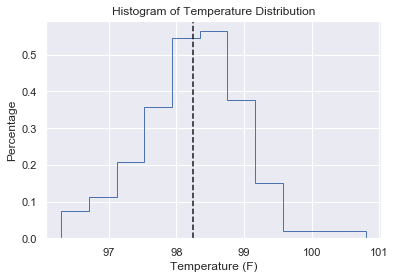

In [5]:
sns.set()
# Plotting histogram of temperature
temp = df['temperature']
_ = plt.hist(temp, bins=11, density=True, histtype='step') #Using the square root rule to approx. # of bins
_ = plt.axvline(np.mean(temp), color='k', linestyle='--') #Plotting the mean as vertical line
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Percentage')
_ = plt.title('Histogram of Temperature Distribution')

In [6]:
#Create function for generating ecdf plots
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

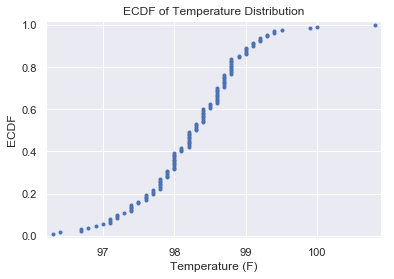

In [7]:
#Plotting ECDF for Temperature
x_temp, y_temp = ecdf(temp)
_ = plt.plot(x_temp, y_temp, '.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Temperature Distribution')
plt.margins(0.02)
plt.show()

##### Findings: 
- The histogram looks roughly symmetric about the mean and mimics a bell-shaped distribution. 
- The ECDF plot looks normal without a strong skew.

### 2. Is the sample size large? Are the observations independent?

In [8]:
df['gender'].describe()

count     130
unique      2
top         F
freq       65
Name: gender, dtype: object

##### Answer: 
- The sample contains 65 observations for male and female each, which suffices the >=30 condition for the Central Limit Theorem.

- The population is not explicitly stated. However, any human can exhibit the two characteristics listed: body temperature and heart rate, therefore concluding that the sample size is less than 10% of the population and is independent.

### 3. Is the true population mean really 98.6 degrees F?

In [9]:
mean_temp = np.mean(temp)
std_temp = np.std(temp)
mean_pop = 98.6

print('Sample Mean: ', mean_temp)
print('Sample Standard Deviation: ', std_temp)
print('Assumed Population Mean: ', mean_pop)

Sample Mean:  98.24923076923078
Sample Standard Deviation:  0.7303577789050377
Assumed Population Mean:  98.6


In [10]:
#Set seed
np.random.seed(13)

#Define function to generate bootstrap replicates
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates    

95% confidence interval =  [98.12538462 98.37538462] Farenheit


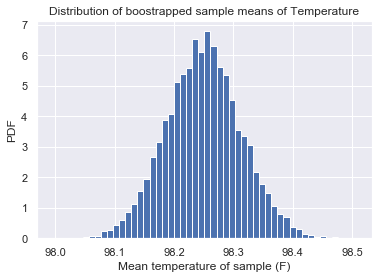

In [11]:
#Constructing a 95% confidence interval
np.random.seed(13)
bs_replicates = draw_bs_reps(temp, np.mean, 10000)
conf_int_temp = np.percentile(bs_replicates, [2.5, 97.5])

print('95% confidence interval = ', conf_int_temp, 'Farenheit')

#Plotting histogram of bootstrapped samples
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Mean temperature of sample (F)')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of boostrapped sample means of Temperature')
plt.show()

##### Findings: Assumed population mean of 98.6F is outside the 95% confidence interval of [98.1 , 98.4]


##### Ready to conduct frequentist testing:
- Using __One-Sample Bootstrap Test__ since we are only looking at one parameter as a whole
- __Z-test__ is appropriate since the sample size is sufficiently large (n>30)
- H0: The population mean is in fact 98.6F.

In [12]:
#Conduct one-sample bootstrap hypothesis test against the assumed population mean
np.random.seed(13)
transformed_temp = temp - mean_temp + mean_pop
bs_replicates_t = draw_bs_reps(transformed_temp, np.mean, 10000)

#p = np.sum(bs_replicates_t <= mean_temp) / 10000
mean_1s = np.mean(bs_replicates_t)
std_1s = np.std(bs_replicates_t)
print('Bootstrap Mean: ', mean_1s)
print('Bootstrap Standard deviation: ', std_1s)
#print('p: ', p)

Bootstrap Mean:  98.60008015384614
Bootstrap Standard deviation:  0.06341517347014468


In [13]:
#Z-test
print('Z-stat in # of Stds (95%): -1.96')
z_temp = mean_1s - 1.96 * std_1s
print('Z-bound: ', z_temp)
print('Sample mean outside the z-bound? : ', (mean_temp < z_temp))

Z-stat in # of Stds (95%): -1.96
Z-bound:  98.47578641384466
Sample mean outside the z-bound? :  True


##### Findings:
- Reject null hypothesis that population mean is 98.6F based on __z-test__ with significance value of 95%.

In [14]:
#T-test
print('T-test in # of Stds (dof=129, 95%): -1.984')
t_temp = mean_1s - 1.984 * std_1s
print('T-bound: ', t_temp)
print('Sample mean outside t-bound? :', (mean_temp < t_temp))

T-test in # of Stds (dof=129, 95%): -1.984
T-bound:  98.47426444968137
Sample mean outside t-bound? : True


##### Findings:
- Reject null hypothesis that population mean is 98.6F based on __t-test__ with significance value of 95%.
- \*A t-test adjusts for sample size, especially smaller ones

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [15]:
#Generate sample of size 10 from data
np.random.seed(13)
sample_temp = np.random.choice(temp, size=10, replace=False) 

mean_small_sample = np.mean(sample_temp)
std_small_sample = np.std(sample_temp)
print(sample_temp)
print('Mean of small sample: ', mean_small_sample)
print('Standard Deviation of small sample: ', std_small_sample)

[100.   98.7  98.4  99.9  97.4  98.3  99.   97.8  96.4  98.8]
Mean of small sample:  98.47
Standard Deviation of small sample:  1.0363879582472957


Small Sample Mean:  98.599088
Small Sample Standard deviation:  0.32737380508525793


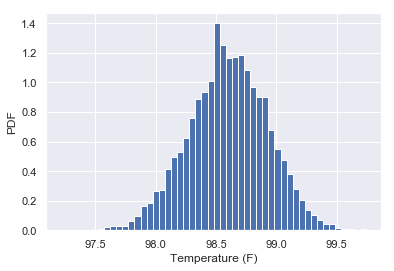

In [16]:
#Perform frequentist test on small sample
np.random.seed(13)
trans_reps_small = sample_temp - np.mean(sample_temp) + mean_pop
bs_replicates_small = draw_bs_reps(trans_reps_small, np.mean, 10000)

mean_small_temp = np.mean(bs_replicates_small)
std_small_temp = np.std(bs_replicates_small)

print('Small Sample Mean: ', mean_small_temp)
print('Small Sample Standard deviation: ', std_small_temp)

_ = plt.hist(bs_replicates_small, bins=50, density=True)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('PDF')
plt.show()

In [17]:
#T-test is more valid with sample size n<30
print('T-test in # of Stds (dof=9, 95%): -2.262')
t_small_temp = mean_small_temp - 2.262 * std_small_temp
print('T-bound: ', t_small_temp)
print('Sample mean outside t-bound? :', (mean_small_sample < t_small_temp))

T-test in # of Stds (dof=9, 95%): -2.262
T-bound:  97.85856845289715
Sample mean outside t-bound? : False


In [18]:
#Z-test
print('Z-stat in # of Stds (95%): -1.96')
z_small_temp = mean_small_temp - 1.96 * std_small_temp
print('Z-bound: ', z_small_temp)
print('Sample mean outside the z-bound? : ', (mean_small_sample < z_small_temp))

Z-stat in # of Stds (95%): -1.96
Z-bound:  97.9574353420329
Sample mean outside the z-bound? :  False


##### Findings:
- T-test would be more accurate in this case since it accounts for sample size
- Cannot reject null hypothesis based on either test

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

95% confidence interval =  [98.47615385 98.72615385] Farenheit
Outside these bounds could be considered 'abnormal'


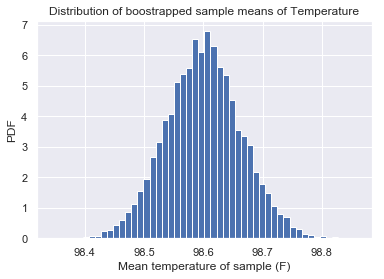

In [19]:
#Constructing a 95% confidence interval
np.random.seed(13)
bs_replicates = draw_bs_reps(transformed_temp, np.mean, 10000)
conf_int_temp = np.percentile(bs_replicates, [2.5, 97.5])

print('95% confidence interval = ', conf_int_temp, 'Farenheit')
print('Outside these bounds could be considered \'abnormal\'')

#Plotting histogram of bootstrapped samples
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Mean temperature of sample (F)')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of boostrapped sample means of Temperature')
plt.show()

### Findings:
- A body temperature of lower than 98.48 F or more higher than 98.73 F could be considered 'abnormal'.

### 6. Is there a significant difference between males and females in normal temperature?

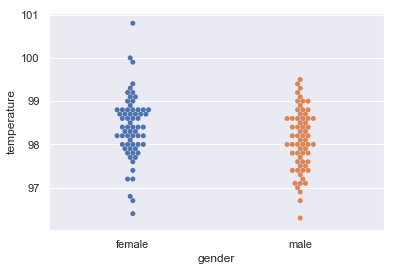

In [20]:
#Construct swarm plot for some EDA
sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xticks(range(2), 'female male'.split())
plt.show()

##### Findings:
- The two genders show similar means.
- Male temps look more spread out, though female temps have more outliers.

In [21]:
male_temp = df[df['gender']=='M']['temperature']
female_temp = df[df['gender']=='F']['temperature']
print('Mean of male temperature: ', np.mean(male_temp))
print('Mean of female temperature: ', np.mean(female_temp))

Mean of male temperature:  98.1046153846154
Mean of female temperature:  98.39384615384613


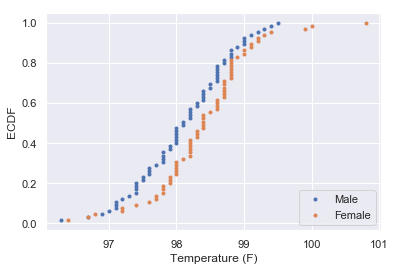

In [22]:
#Construct ECDF on both genders
x_male, y_male = ecdf(male_temp)
x_female, y_female = ecdf(female_temp)
_ = plt.plot(x_male, y_male, '.', linestyle='none')
_ = plt.plot(x_female, y_female, '.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(['Male', 'Female'], loc='lower right')
plt.show()

##### Findings: Looks like there is some difference between each of the gender's distributions based on ECDF.

In [23]:
np.random.seed(13)
def draw_perm_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

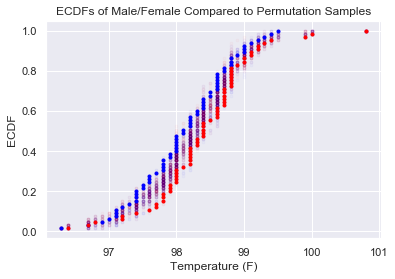

In [24]:
#Plotting ECDF of permutation samples on top of the two gender ECDFs
np.random.seed(13)
for i in range(50):
    perm_sample_1, perm_sample_2 = draw_perm_sample(male_temp, female_temp)
    
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    _ = plt.plot(x_1, y_1, '.', linestyle='none', color='blue', alpha=0.02)
    _ = plt.plot(x_2, y_2, '.', linestyle='none', color='red', alpha=0.02)
    
x_1, y_1 = ecdf(male_temp)
x_2, y_2 = ecdf(female_temp)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='blue', label='Male')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='red', label='Female')
_ = plt.title('ECDFs of Male/Female Compared to Permutation Samples')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
plt.show()

##### Findings: 
- Looks to be some overlap between permutation samples and the two individual genders
- Not a significant difference between the two sexes

In [25]:
np.random.seed(13)
def diff_of_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

def draw_perm_reps(data1, data2, func, size=1):
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_1, perm_2 = draw_perm_sample(data1, data2)
        perm_replicates[i] = func(perm_1, perm_2)
    
    return perm_replicates

##### H0: The two genders have the same normal temperature

In [26]:
#Calculate a p-value based on permuation testing of the two genders
np.random.seed(13)
emp_mean_diff = diff_of_means(female_temp, male_temp)

perm_replicates = draw_perm_reps(female_temp, male_temp, diff_of_means, 10000)

p = np.sum(perm_replicates >= emp_mean_diff) / len(perm_replicates)
print('p: ', p)

p:  0.0118


##### Findings: The p-value for difference in means would:
- reject the null hypothesis with alpha=95%
- fail to reject the null with alpha=99%

#### \*\*Conclusions: (Assuming a significance level of 95%)

- The average normal temperature of the human body based on the sample seems to be a tad lower than the proposed 98.6 F. 
- Males and females have the same normal temperature

### Extra: Is there strong correlation between body temperature and heart rate?

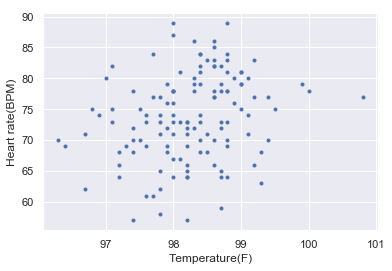

In [27]:
heart_rate = df['heart_rate']
_ = plt.plot(temp, heart_rate, '.', linestyle='none')
_ = plt.xlabel('Temperature(F)')
_ = plt.ylabel('Heart rate(BPM)')
plt.show()

In [28]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0][1]

In [29]:
#Testing independence/correlation with permutation test
np.random.seed(13)
r_obs = pearson_r(temp, heart_rate)

perm_replicates = np.empty(10000)

for i in range(10000):
    permuted_temp = np.random.permutation(temp)
    perm_replicates[i] = pearson_r(permuted_temp, heart_rate)
    
p = np.sum(perm_replicates >= r_obs) / 10000
print('p: ', p)

p:  0.0019


##### Findings:
- There is sufficient correlation between body temperature and heart rate